In [1]:
#We Now attempt to use the pre-implemented models in keras as feature extractors to serve as the basis for a Support 
#Vector machine.

In [1]:
import sys
sys.path.append("/usr/local/lib/python3.6/site-packages")
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications import resnet50
from keras.applications import inception_resnet_v2
import scipy


import keras.backend as K

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Conv3D

from keras.models import Model

from keras.utils import plot_model
from IPython.display import Image
from visualizations import *

import tensorflow as tf
from sklearn import svm
from random import shuffle
from utils_TFLearn import *

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# VGG16 as base

In [2]:
VGG16=keras.applications.vgg16.VGG16()

In [3]:
VGG16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
# Removes the 1000 node densely connected layer and the 4096 layer as the feature vector
out=VGG16.get_layer('fc1').output
Feat_extract=Model(inputs=VGG16.inputs, outputs=out)

In [8]:
#generate data from files
train_datagen=image.ImageDataGenerator( rescale=1/255,
                                       shear_range=0.2, zoom_range=0.2, horizontal_flip= True)
test_datagen=image.ImageDataGenerator(rescale=1/255)
train_set=train_datagen.flow_from_directory('Data_set1_LFS/Training', target_size=(224,224), batch_size=789, class_mode='binary')
test_set=test_datagen.flow_from_directory('Data_set1_LFS/Test', target_size=(224,224), batch_size=90, class_mode="binary")

Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [9]:
#generate the numpy arrays from the generators
train_data=train_set[0][0]
train_labels=train_set[0][1]

test_data=test_set[0][0]
test_labels=test_set[0][1]  

In [10]:
#now we run the featur# extractor
test_features=Feat_extract.predict(test_data)  
train_features=Feat_extract.predict(train_data)

# Visualizing Convolutional layers

In [5]:
model=VGG16
layer_name='block1_conv1'
save_path="test_vis_func.jpg"
visualize_filter(model, layer_name, filters=None, image=None, save_path=save_path,
                 n=7, loss_min=0, grad_check=True, steps=20, step_size=1)

Processing filter 0
Current loss value: 7.8814735
Current loss value: 9.85808
Current loss value: 11.918587
Current loss value: 14.029982
Current loss value: 16.179306
Current loss value: 18.35721
Current loss value: 20.55549
Current loss value: 22.769728
Current loss value: 24.997011
Current loss value: 27.236248
Current loss value: 29.484554
Current loss value: 31.741116
Current loss value: 34.00434
Current loss value: 36.27343
Current loss value: 38.54744
Current loss value: 40.826633
Current loss value: 43.110172
Current loss value: 45.397755
Current loss value: 47.688747
Current loss value: 49.9829
Filter 0 processed in 0s
Processing filter 1
Current loss value: 28.475569
Current loss value: 32.053894
Current loss value: 35.632233
Current loss value: 39.21053
Current loss value: 42.78885
Current loss value: 46.367176
Current loss value: 49.945503
Current loss value: 53.523834
Current loss value: 57.102135
Current loss value: 60.680496
Current loss value: 64.25879
Current loss valu

Current loss value: 0.63535666
Current loss value: 0.8048162
Current loss value: 0.9742757
Current loss value: 1.1437354
Current loss value: 1.3131951
Current loss value: 1.4826545
Current loss value: 1.652114
Current loss value: 1.8215737
Current loss value: 1.9910333
Current loss value: 2.1604927
Current loss value: 2.3299522
Current loss value: 2.4994118
Current loss value: 2.6688714
Current loss value: 2.838331
Current loss value: 3.0077908
Current loss value: 3.17725
Current loss value: 3.3467095
Current loss value: 3.5161693
Current loss value: 3.685629
Current loss value: 3.8550882
Filter 14 processed in 0s
Processing filter 15
Current loss value: 0.7662573
Current loss value: 2.6885586
Current loss value: 5.290942
Current loss value: 8.33342
Current loss value: 11.683589
Current loss value: 15.263335
Current loss value: 19.015285
Current loss value: 22.891094
Current loss value: 26.857567
Current loss value: 30.887972
Current loss value: 34.96193
Current loss value: 39.066513
C

Current loss value: 0.62955856
Current loss value: 0.82605743
Current loss value: 1.0225571
Current loss value: 1.2190561
Current loss value: 1.4155558
Current loss value: 1.6120535
Current loss value: 1.8085542
Current loss value: 2.005053
Current loss value: 2.2015522
Current loss value: 2.398051
Current loss value: 2.5945506
Current loss value: 2.7910502
Current loss value: 2.9875488
Current loss value: 3.1840482
Current loss value: 3.3805482
Current loss value: 3.577046
Current loss value: 3.7735462
Current loss value: 3.9700446
Current loss value: 4.166542
Current loss value: 4.363042
Filter 28 processed in 0s
Processing filter 29
Current loss value: 0.100250475
Current loss value: 0.25224185
Current loss value: 0.42689645
Current loss value: 0.71351844
Current loss value: 1.0612953
Current loss value: 1.4781394
Current loss value: 1.9335225
Current loss value: 2.4092062
Current loss value: 2.9188824
Current loss value: 3.4679308
Current loss value: 4.0413365
Current loss value: 4

Current loss value: 2.5767307
Current loss value: 2.7404904
Current loss value: 2.9042501
Current loss value: 3.06801
Current loss value: 3.231769
Current loss value: 3.395529
Current loss value: 3.5592885
Current loss value: 3.723048
Current loss value: 3.8868074
Filter 43 processed in 0s
Processing filter 44
Current loss value: 2.661509
Current loss value: 3.7436078
Current loss value: 4.8940997
Current loss value: 6.0909986
Current loss value: 7.3193445
Current loss value: 8.5699005
Current loss value: 9.837195
Current loss value: 11.117192
Current loss value: 12.40712
Current loss value: 13.705519
Current loss value: 15.010828
Current loss value: 16.321947
Current loss value: 17.638205
Current loss value: 18.958954
Current loss value: 20.28331
Current loss value: 21.610914
Current loss value: 22.941
Current loss value: 24.273657
Current loss value: 25.608658
Current loss value: 26.945745
Filter 44 processed in 0s
Processing filter 45
Current loss value: 6.3457155
Current loss value

Current loss value: 19.823175
Current loss value: 21.379818
Current loss value: 22.93991
Current loss value: 24.502813
Current loss value: 26.068129
Current loss value: 27.635733
Current loss value: 29.205149
Current loss value: 30.776644
Current loss value: 32.34964
Filter 56 processed in 0s
Processing filter 57
Current loss value: 2.7123964
Current loss value: 4.3904243
Current loss value: 6.2223654
Current loss value: 8.164462
Current loss value: 10.186251
Current loss value: 12.2650175
Current loss value: 14.385508
Current loss value: 16.538614
Current loss value: 18.719294
Current loss value: 20.922878
Current loss value: 23.144321
Current loss value: 25.378996
Current loss value: 27.626251
Current loss value: 29.885145
Current loss value: 32.154137
Current loss value: 34.43105
Current loss value: 36.715767
Current loss value: 39.007812
Current loss value: 41.305824
Current loss value: 43.609055
Filter 57 processed in 0s
Processing filter 58
Current loss value: 7.4844885
Current l

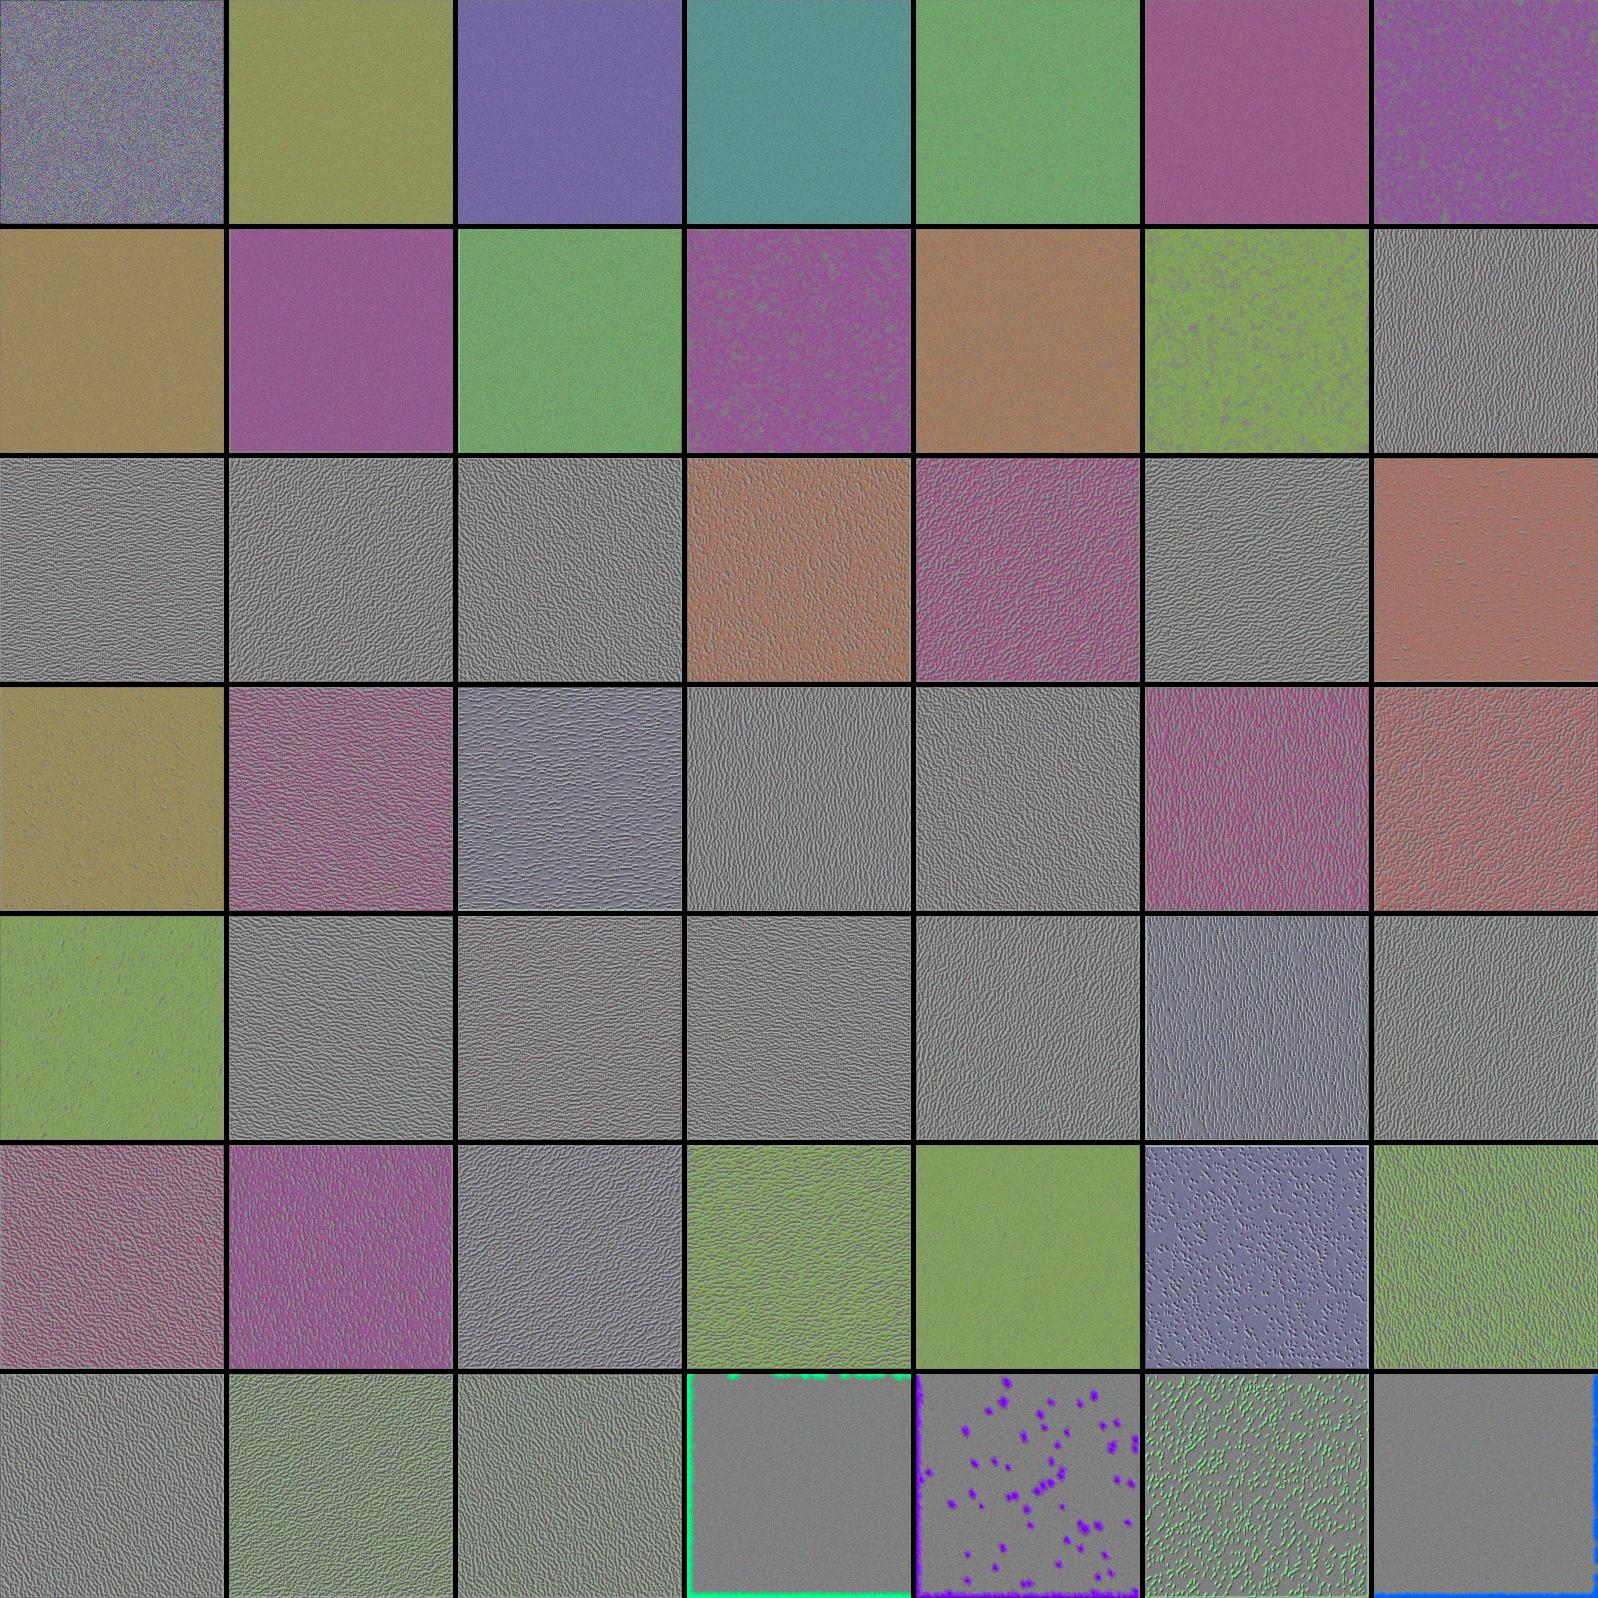

In [8]:
#visualization of the first convolutional layer of VGG16
filters_vissed=Image(data="test_vis_func.jpg")
display(filters_vissed)

## SVM from skLearn

In [10]:
# create a classifier with default settings with sklearn
clf=svm.SVC(probability=True) 
clf.fit(train_features,train_labels);


In [11]:
#Best parameters thus far
clf_tune=svm.SVC(gamma=.001,C=1000) 
clf_tune.fit(train_features,train_labels)
#Testing the accuraccy of the SVM
print('Training Accuracy of SVM(C=1000, gamma=.001): ',clf_tune.score(train_features,train_labels))
print('Testing Accuracy of SVM(C=1000, gamma=.001): ',clf_tune.score(test_features,test_labels))

Training Accuracy of SVM(C=1000, gamma=.001):  1.0
Testing Accuracy of SVM(C=1000, gamma=.001):  0.9


In [12]:
clf_lin=svm.LinearSVC(C=.0069)
clf_lin.fit(train_features,train_labels);
#Testing the accuraccy of the SVM
print('Training Accuracy of linear SVM(C=1, gamma=.0069): ',clf_lin.score(train_features,train_labels))
print('Testing Accuracy of linear SVM(C=1, gamma=.0069): ',clf_lin.score(test_features,test_labels))

Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9340937896070975
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8555555555555555


In [13]:
#now we rejoin the test and training sets to see accuracy over the whole data set
features=np.concatenate((train_features,test_features))
labels=np.concatenate((train_labels,test_labels))
labels=np.expand_dims(labels,1)

combined=np.concatenate((features,labels),axis=1)
shuffle(combined)
combined=np.array(combined)

features=np.split(combined,[4096],axis=1)[0]
labels=np.split(combined,[4096],axis=1)[1]


In [14]:
#this processes the data in batches and we will use this to get an average accuracy
model=clf_lin
n=len(features)
batch_size=32 
accuracy_list=[]
start=0 #start of the batch
while start<n:
    if start+batch_size<=n:
        end=start+batch_size
    else:
        end=n
    batch=features[start:end]
    batch_label=labels[start:end]
    acc=model.score(batch,batch_label)
    accuracy_list.append(acc)
    start=end
#current script does not account for the potential of the batch sizes to be different
#combines training and testing data

In [15]:
acc_arr=np.array(accuracy_list)
mean_acc=acc_arr.mean()
print("The mean accuracies of these trials are: ", mean_acc)

The mean accuracies of these trials are:  0.9352678571428571


In [16]:
#in comparing the above we observe slight overfitting in the tuned SVM when compared to the Linear Classifier. 

In [17]:
#not yet fully implemented
def test_model_svm(data,lables,model,give_confidence=False):
    """
    Tests a trained binary classification model on a test set of data, with a corresponding list oflables. 
    The model makes a prediction on the data, and records which images are misclassified and as what, and 
    returns this data as lists. 
    
    
    
    Input:
    ------------------
    model: an sklearn svm
    
    data: a list preprocessed numpy arrays which are valid inputs for the model
    
    lables: a list the same lenght as data such that the ith item in data had the same label as the ith 
    element in lables. This list has values 0 or 1
            
    give_confidence: if this is true, the model also returns the confidence of the classifcation.
            
    Output: (pred_1_but_0,pred_0_but_1,conf)
    --------------------
    
    MisClassified_0: list of indices whose classification was labled 1, but the expected output was 0
     
    MisClassified_1: "     "     "       "     "        "      "     0    "    "        "       "   1
    
    conf: an array of 
    
    """
    MisClassified_0=[]
    MisClassified_1=[]
    
    
    for i, arr in enumerate(data):
        arr=np.expand_dims(arr,0)
        prediction=model.predict(arr)
        if not prediction==lables[i]:
            if lables[i]==0: #if the expected label is 0
                MisClassified_0.append(i)
            else:
                MisClassified_1.append(i)
    if give_confidence:
        conf=model.predict(data)
        return MisClassified_0, MisClassified_1, conf
    else:
        return MisClassified_0, MisClassified_1

In [18]:
train_set.class_indices

{'Not-Precip': 0, 'Precip': 1}

In [19]:
#data=np.concatenate((train_features,test_features))
#labels=np.concatenate((train_labels,test_labels))

data=test_features
labels=test_labels
Misclassified_nonPrecip, Misclassified_Precip =test_model_svm(data, labels, clf_tune, give_confidence=False)

In [ ]:
for index in Misclassified_Precip:  #displays images labeled precip, but predicted non-precip
    if labels[index] == 0:
        display_NParray(test_data[index])

In [ ]:
for index in Misclassified_nonPrecip: #displays images labeled non-precip, but predicted precip
    if labels[index] == 1:
        display_NParray(test_data[index])

[[39  6]
 [ 3 42]]


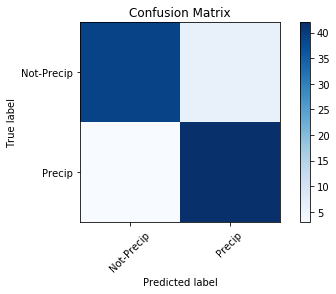

In [23]:
classes=dict_to_list(test_set.class_indices)
print(plot_confusion_matrix(clf_tune, data, labels, classes))
plt.savefig("images/CM_VGG16_SVMlin")

## SVM through training final layer with hinge loss

In [52]:
# First attempt at using keras training to create an SVM



from keras.regularizers import l2
#freeze all other layers 
for layer in Feat_extract.layers:
    layer.trainable=False

    
test_labels_SVM=test_labels*2-1 #makes lables in {1,-1} as mentioned in https://github.com/keras-team/keras/issues/2588
train_labels_SVM=train_labels*2-1

SVM_trans_layers=Feat_extract.layers

#add a linear dense layer
SVM_trans_layers.append(Dense(1,activation='tanh', kernel_regularizer=l2(.001)))

SVM_trans_VGG=Sequential(layers=SVM_trans_layers)
SVM_trans_VGG.compile(loss='hinge',optimizer='adam',metrics=['accuracy'])

In [70]:
SVM_trans_VGG.fit(data,labels, validation_split=0.1,batch_size=32,epochs=10,shuffle=True)

Train on 791 samples, validate on 88 samples
Epoch 1/10
791/791 [==============================] - 337s 426ms/step - loss: 0.5007 - acc: 0.5019 - val_loss: 0.5131 - val_acc: 0.4886
Epoch 2/10
791/791 [==============================] - 330s 418ms/step - loss: 0.4998 - acc: 0.5019 - val_loss: 0.5130 - val_acc: 0.4886
Epoch 3/10
791/791 [==============================] - 335s 424ms/step - loss: 0.4997 - acc: 0.5019 - val_loss: 0.5130 - val_acc: 0.4886
Epoch 4/10
791/791 [==============================] - 345s 436ms/step - loss: 0.4997 - acc: 0.5019 - val_loss: 0.5129 - val_acc: 0.4886
Epoch 5/10
791/791 [==============================] - 356s 450ms/step - loss: 0.4996 - acc: 0.5019 - val_loss: 0.5128 - val_acc: 0.4886
Epoch 6/10
791/791 [==============================] - 356s 450ms/step - loss: 0.4996 - acc: 0.5019 - val_loss: 0.5128 - val_acc: 0.4886
Epoch 7/10
791/791 [==============================] - 355s 449ms/step - loss: 0.4995 - acc: 0.5019 - val_loss: 0.5127 - val_acc: 0.4886
Epo

In [20]:
# We now try to see what happens if we take out SVM and begin to train different layers from the top down

In [2]:

from keras import backend as K
from keras.engine.topology import Layer
import tensorflow as tf
import numpy as np



class LinearSVM(Layer):
    """
    This layer takes a 2D Tensor (batch,features), and outputs the results of a SVM applied to that Tensor, returning 
    a 1D tensors of predictions of size (batch).
    
    The SVM to be used is a LinearSVM implemented in sklearn
    """
    def __init__(self, coef, intercept, **kwargs):
        self.coef=coef
        self.intercept=intercept
        self.use_bias=False
        self.trainable=False
        super(LinearSVM, self).__init__(**kwargs)
        

        
    def build(self, input_shape):
        """
        We expect an input shape of the form (batch,row,column,channel)
        TODO: allow for channel-first functionality 
        
        if we have our constant parameter set to true, then we shall make our kernel a normalized 
        """
        #for some reason the config file with save the np_arrays as dictionaries of the form
        #{"type":ndarray, "value":<actual array> } so this code allow the model to load from configure
        if isinstance(self.coef,dict): 
            self.coef=self.coef['value']
        if isinstance(self.intercept,dict):  
            self.intercept=self.intercept['value']
            
        self.kernel=K.variable(self.coef)
        self.kernel=K.transpose(self.kernel)
        self.intercept_const=K.variable(self.intercept) 
        super(LinearSVM, self).build(input_shape)  # Be sure to call this at the end
        
    def call(self, x):
        
        return (K.dot(x, self.kernel)+self.intercept_const)
    
    def get_config(self):
        config={"coef":self.coef,"intercept":self.intercept}
        base_config = super(LinearSVM, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
        

    def compute_output_shape(self, input_shape):
        return (input_shape[0],1)

In [186]:


#Create layers
In=Input(shape=(4096,))
test_LinSVM=LinearSVM(clf_lin.coef_,clf_lin.intercept_)(In)
predictions=Activation('tanh')(test_LinSVM)
SVMlin=Model(inputs=In, outputs=predictions )


In [ ]:
pred_conf=SVMlin.predict(data)
pred_keras=(pred_conf>0).astype('float32')
pred_sk=clf_lin.predict(data)
for i in range(len(pred_conf)):
    if(pred_keras[i][0]==pred_sk[i]):
        print(i)
#as shown below, the current model (in these cases) projects the same accuracy 

In [70]:
LinSVM=LinearSVM(clf_lin.coef_,clf_lin.intercept_)(Feat_extract.output)
predictions=Activation('tanh')(LinSVM)
VGG16_SVM=Model(inputs=Feat_extract.inputs, outputs=predictions)

In [72]:
VGG16_SVM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [73]:
pred_conf=VGG16_SVM.predict(test_data)

In [75]:
pred_keras=(pred_conf>0).astype('float32')
pred_sk=clf_lin.predict(test_features)
wrong=0
for i in range(len(pred_conf)):
    if not pred_keras[i][0]==pred_sk[i]:
        wrong+=1
        print(i,'th prediction is incorrect') #only prints if there is a different classification than the 
                                              # linear classifier
print(wrong)

0


In [77]:
for layers in VGG16_SVM.layers:
    layers.trainable=False
VGG16_SVM.layers[-3].trainable=True

In [78]:
VGG16_SVM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [79]:
VGG16_SVM.save('models_LFS/VGG16_SVMlin_1.0.h5')

In [11]:
MyLayer={"LinearSVM":LinearSVM}
test_load=keras.models.load_model('models_LFS/VGG16_SVMlin_1.0.h5',custom_objects=MyLayer)

/usr/local/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
test_load.predict_generator(test_set,steps=90) # test of prediction of linear SVM with VGG16

In [ ]:
# As of now we have a pipeline which takes a keras model base and appends to the end an SVM, trained independently
# in SKlearn. We have yet to fully test a training procedure on this model. 

In [30]:
Val_Acc=[]
Train_Acc=[]
num_trials=20
for i in range(num_trials):
    #now we run the featur# extractor
    #generate data from files
    train_datagen=image.ImageDataGenerator( rescale=1/255,
                                       shear_range=0.2, zoom_range=0.2, horizontal_flip= True)
    test_datagen=image.ImageDataGenerator(rescale=1/255)
    train_set=train_datagen.flow_from_directory('Data_set1/Training', target_size=(224,224),
                                                batch_size=789, class_mode='sparse')
    test_set=test_datagen.flow_from_directory('Data_set1/Test', target_size=(224,224), 
                                              batch_size=90, class_mode="sparse")
    
    #generate the numpy arrays from the generators
    train_data=train_set[0][0]
    train_labels=train_set[0][1]

    test_data=test_set[0][0]
    test_labels=test_set[0][1]  
    
    
    test_features=Feat_extract.predict(test_data)  
    train_features=Feat_extract.predict(train_data)
    
    clf_lin=svm.LinearSVC(C=.0069)
    clf_lin.fit(train_features,train_labels);
    
    train_acc=clf_lin.score(train_features,train_labels)
    test_acc=clf_lin.score(test_features,test_labels)
    
    Val_Acc.append(test_acc)
    Train_Acc.append(train_acc)
    
    print('Training Accuracy of linear SVM(C=1, gamma=.0069): ',train_acc)
    print('Testing Accuracy of linear SVM(C=1, gamma=.0069): ',test_acc)
    


Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9404309252217997
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8444444444444444
Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9366286438529785
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8777777777777778
Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9391634980988594
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8666666666666667
Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9416983523447402
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8777777777777778
Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM

In [34]:
print(mean_Val_Acc)
print(mean_Train_Acc)

0.8616666666666667
0.9394803548795944


In [ ]:
#Current status: 
#we have constructed a feature extractor from a base keras model (use case VGG16)
#We have also used these extractors in a pipline to train several different SVMs
#We converted the keras=> sklearn pipeline into a full keras model by implementing linear SVM layer
#
#TODO:
#fix SVM layer so that we can train the model
#try other bases to compare results
#get GPU and larger amount of data so that we can try base initialization of a pretrained model. 